<a href="https://colab.research.google.com/github/anarchy1989/Daily-Dose-of-Data-Science/blob/main/joining_the_stations_and_temperature_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
temp_df = pd.read_csv('/content/drive/MyDrive/urban-heat-analysis/toulouse_metro_temperature_data.csv', parse_dates=['date'])
temp_df.head()

,Unnamed: 0,data,id,date,temperature
0,0,26ed1b3209b00000cbf63400,19.0,2020-07-13 22:00:00+00:00,22.2
1,1,26ee10b125d80000abd83400,19.0,2020-07-14 01:00:00+00:00,18.9
2,2,26ee10f111e80000abd82c00,19.0,2020-07-14 01:30:00+00:00,18.4
3,3,26ee1a3221d000010b984c00,19.0,2020-07-14 20:00:00+00:00,22.8
4,4,26ef11f092a800008bb82c00,19.0,2020-07-15 03:30:00+00:00,16.4


In [ ]:
temp_df.sort_values(by=['id','date'])

,Unnamed: 0,data,id,date,temperature
3047447,3047447,00c816d0865000000bec0c00,0.0,2020-06-08 13:15:00+00:00,16.1
3018593,3018593,00c816f0c23801d04be62000,0.0,2020-06-08 13:30:00+00:00,17.0
3031150,3031150,00c81710c24002504be82c00,0.0,2020-06-08 13:45:00+00:00,17.0
3030112,3030112,00c81730d22800006be82c00,0.0,2020-06-08 14:00:00+00:00,17.4
3029875,3029875,00c817510df800004bf63400,0.0,2020-06-08 14:15:00+00:00,18.3
...,...,...,...,...,...
3852752,3852752,"1,19401704238E+023",NaN,NaT,NaN
3853317,3853317,"1,17607300638E+023",NaN,NaT,NaN
3920631,3920631,"1,79769313486232E+308",NaN,NaT,NaN
4615282,4615282,"3,79507904598E+023",NaN,NaT,NaN


In [ ]:
temp_df.drop(columns=['Unnamed: 0'], inplace=True)

In [ ]:
df_stations = pd.read_csv('/content/drive/MyDrive/urban-heat-analysis/stations-meteo-en-place (1).csv', sep=';', parse_dates=['installation'])
df_stations.head()

,longitude,latitude,altitude,id_nom,id_numero,emission,installation,type_stati,lcz,ville,bati,veg_haute,geopoint
0,1.441292,43.585339,138.21,63-station-meteo-toulouse-LIFE-soufflot,63,V,2020-02-10,TH,2,Toulouse,43126.6164,26098.3000,"43.58533929, 1.441291712"
1,1.436834,43.589038,136.77,05-station-meteo-toulouse-LIFE-hall-1,5,V,2020-02-10,TH,8,Toulouse,43927.7938,31323.8639,"43.58903752, 1.436834217"
2,1.425674,43.633819,132.80,58-station-meteo-toulouse-fondeyre,58,V,2019-07-02,ISS,8,Toulouse,60009.0006,553.3777,"43.63381884, 1.425674104"
3,1.476286,43.583830,166.55,45-station-meteo-toulouse-st-exupery,45,V,2019-07-02,ISS,6,Toulouse,42319.6682,13070.0013,"43.58383021, 1.476286095"
4,1.241884,43.616426,191.40,18-station-meteo-brax-ecole,18,V,2017-06-26,ISS,6,Brax,30135.7248,58508.0681,"43.61642579, 1.241883645"


In [ ]:
# remove none values if date or id is missing:
temp_df = temp_df.dropna(subset=['date', 'id'])

In [ ]:
temp_df.isna().sum()

,0
data,0
id,0
date,0
temperature,0


In [ ]:
temp_df['id'] = temp_df['id'].astype(int)

In [ ]:
# The geopoint is redundant
df_stations.drop(columns=['geopoint'], inplace=True)

In [ ]:
#rename the id_numero column:
df_stations = df_stations.rename(columns={'id_numero': 'id'})

In [ ]:
df_stations['id'] = df_stations['id'].astype(int)

In [ ]:
temp_df.shape

(5264718, 4)

In [ ]:
temp_df_cleaned = temp_df[temp_df['date'].dt.date < datetime.datetime.today().date()]

In [ ]:
temp_df_cleaned.shape

(5260162, 4)

In [ ]:
#removing abnormal temperatures, allowing a max of -20°C:

temp_df_cleaned = temp_df_cleaned[temp_df_cleaned['temperature'] > -20]

In [ ]:
temp_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5077733 entries, 0 to 5275954
Data columns (total 4 columns):
 #   Column       Dtype              
---  ------       -----              
 0   data         object             
 1   id           int64              
 2   date         datetime64[ns, UTC]
 3   temperature  float64            
dtypes: datetime64[ns, UTC](1), float64(1), int64(1), object(1)
memory usage: 193.7+ MB


In [ ]:
temp_df_cleaned.drop_duplicates()

,data,id,date,temperature
0,26ed1b3209b00000cbf63400,19,2020-07-13 22:00:00+00:00,22.2
1,26ee10b125d80000abd83400,19,2020-07-14 01:00:00+00:00,18.9
2,26ee10f111e80000abd82c00,19,2020-07-14 01:30:00+00:00,18.4
3,26ee1a3221d000010b984c00,19,2020-07-14 20:00:00+00:00,22.8
4,26ef11f092a800008bb82c00,19,2020-07-15 03:30:00+00:00,16.4
...,...,...,...,...
5275950,0259196f52900862cc16a800,1,2020-02-25 19:30:00+00:00,11.4
5275951,025d19af1aa016c080122840,1,2020-02-29 20:00:00+00:00,10.6
5275952,024619ceca9002d1c0086c00,1,2020-06-02 21:15:00+00:00,9.2
5275953,025a17ee8ea808718c584c00,1,2020-02-26 16:30:00+00:00,8.3


In [ ]:
#Join the df_stations with our temp_data

temp_df_cleaned = temp_df_cleaned.merge(df_stations[['id', 'longitude','latitude','altitude', 'lcz',	'ville', 'installation']], on='id')
temp_df_cleaned.head()


,data,id,date,temperature,longitude,latitude,altitude,lcz,ville,installation
0,26ed1b3209b00000cbf63400,19,2020-07-13 22:00:00+00:00,22.2,1.556402,43.633734,206.4,9,Mondouzil,2017-06-26
1,26ee10b125d80000abd83400,19,2020-07-14 01:00:00+00:00,18.9,1.556402,43.633734,206.4,9,Mondouzil,2017-06-26
2,26ee10f111e80000abd82c00,19,2020-07-14 01:30:00+00:00,18.4,1.556402,43.633734,206.4,9,Mondouzil,2017-06-26
3,26ee1a3221d000010b984c00,19,2020-07-14 20:00:00+00:00,22.8,1.556402,43.633734,206.4,9,Mondouzil,2017-06-26
4,26ef11f092a800008bb82c00,19,2020-07-15 03:30:00+00:00,16.4,1.556402,43.633734,206.4,9,Mondouzil,2017-06-26


In [ ]:
min_max_measure = temp_df_cleaned.groupby(['id',pd.Grouper(key='date', freq='3h')]).agg({'temperature': 'count'}).sort_values(by=('temperature')).reset_index()
station_31= min_max_measure[(min_max_measure['id'] == 31) & (min_max_measure['date'].dt.year == 2023)].sort_values(by=['date', 'temperature'])
station_31

,id,date,temperature
106724,31,2023-01-01 00:00:00+00:00,12
106723,31,2023-01-01 03:00:00+00:00,12
34086,31,2023-01-01 06:00:00+00:00,11
106722,31,2023-01-01 09:00:00+00:00,12
34085,31,2023-01-01 12:00:00+00:00,11
...,...,...,...
35761,31,2023-12-31 09:00:00+00:00,11
94877,31,2023-12-31 12:00:00+00:00,12
94869,31,2023-12-31 15:00:00+00:00,12
35759,31,2023-12-31 18:00:00+00:00,11


#**A simple test on the reference station**

<Axes: xlabel='date', ylabel='temperature'>

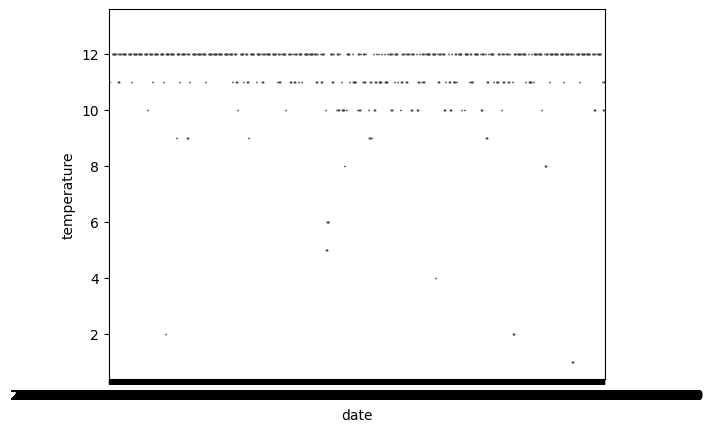

In [ ]:
import seaborn as sns

sns.boxplot(station_31, x='date', y='temperature')

In [ ]:
temp_df_cleaned.shape

In [ ]:
temp_df_cleaned.to_csv('/content/drive/MyDrive/urban-heat-analysis/temperature_stations.csv')